# Training and finding best model for the submission

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv("../data/train.csv", index_col='id')
test_df = pd.read_csv("../data/test.csv", index_col='id')

In [6]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,32,1272,2018,74349,3,769,31,60,3,1,0,11000
1,30,384,2007,80000,3,418,9,45,25,1,0,8250
2,27,358,2009,91491,3,265,5,9,6,1,0,15000
3,30,1562,2022,2437,6,860,17,87,43,1,0,63500
4,9,223,2001,111000,3,81,4,48,25,1,0,7850


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54273 entries, 0 to 54272
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         54273 non-null  object
 1   model         54273 non-null  object
 2   model_year    54273 non-null  int64 
 3   milage        54273 non-null  int64 
 4   fuel_type     54273 non-null  object
 5   engine        54273 non-null  object
 6   transmission  54273 non-null  object
 7   ext_col       54273 non-null  object
 8   int_col       54273 non-null  object
 9   accident      54273 non-null  object
 10  clean_title   54273 non-null  object
 11  price         54273 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 5.4+ MB


In [4]:
# cetegorize features

def ordinal_feature_labeler(df ,features_list, target):
    ''' 
    This function will label categorical features list features to ordinal label.
    '''
    transformed_df = pd.DataFrame({"temp":np.arange(df.shape[0])}, index=df.index)

    transformed_label_data = {}

    for feature in features_list:
        ordered_values = df.groupby([feature])[target].median().sort_values().index.to_list()
        n = len(ordered_values)

        value_dict = {i:j for i, j in zip(ordered_values, list(range(n)))}

        # copy the categories values data
        transformed_label_data[feature] = value_dict.copy()

        transformed_df[feature] = df[feature].apply(lambda x: value_dict[x])
    
    transformed_df.drop(['temp'], axis=1, inplace=True)

    return transformed_df, transformed_label_data


def label_from_dict(df, label_dict):
    """
    Transforms the given df categorical labels according to given dict labels.
    """
    temp_df = df.copy()

    for feature in label_dict.keys():
        labels = label_dict[feature]
        temp_df[feature] = temp_df[feature].apply(lambda x: labels[x] if x in labels.keys() else len(label_dict) / 2)

    return temp_df




In [5]:
# transforming columns
feature_to_transform = 'brand model fuel_type engine transmission ext_col int_col accident clean_title'.split()
dont_change = 'model_year milage price'.split()

temp_df, labels = ordinal_feature_labeler(df, feature_to_transform, 'price')

df = label_from_dict(df, labels)
test_df = label_from_dict(test_df, labels)


df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,32,1272,2018,74349,3,769,31,60,3,1,0,11000
1,30,384,2007,80000,3,418,9,45,25,1,0,8250
2,27,358,2009,91491,3,265,5,9,6,1,0,15000
3,30,1562,2022,2437,6,860,17,87,43,1,0,63500
4,9,223,2001,111000,3,81,4,48,25,1,0,7850


In [63]:
# adding features 
df['car_score'] = df[['fuel_type', 'engine', 'transmission', 'ext_col', 'int_col']].sum(axis=1)
test_df['car_score'] = test_df[['fuel_type', 'engine', 'transmission', 'ext_col', 'int_col']].sum(axis=1)
df['model_year'] = 2024 - df['model_year']
test_df['model_year'] = 2024 - test_df['model_year']
df['milage_per_year'] = df['milage'] / (df['model_year'] + 1) 
test_df['milage_per_year'] = test_df['milage'] / (test_df['model_year'] + 1)


In [64]:
test_df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,car_score,milage_per_year
id,,,,,,,,,,,,,
54273,34.0,694.0,10,73000,3,437.0,4.0,48.0,6.0,1,0,498.0,6636.363636
54274,25.0,613.0,9,128032,3,143.0,19.0,16.0,25.0,1,0,206.0,12803.200000
54275,34.0,989.0,9,51983,3,534.0,15.0,60.0,54.0,1,0,666.0,5198.300000
54276,36.0,1506.0,6,29500,3,894.0,17.0,48.0,54.0,0,0,1016.0,4214.285714
54277,30.0,1479.0,4,90000,3,736.0,19.0,48.0,25.0,0,0,831.0,18000.000000


In [65]:
# target specifier
target = df['price'].copy()
df.drop(['price'], axis=1, inplace=True)

df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,car_score,milage_per_year
id,,,,,,,,,,,,,
0,32,1272,6,74349,3,769,31,60,3,1,0,866,10621.285714
1,30,384,17,80000,3,418,9,45,25,1,0,500,4444.444444
2,27,358,15,91491,3,265,5,9,6,1,0,288,5718.187500
3,30,1562,2,2437,6,860,17,87,43,1,0,1013,812.333333
4,9,223,23,111000,3,81,4,48,25,1,0,161,4625.000000


In [66]:
# let's make some cluster in the datasets
from sklearn.cluster import KMeans

n = 100

cluster = KMeans(n_clusters=n)


# cluster 1
cluster.fit(df[['milage', 'model_year']])
df['cluster'] = cluster.labels_
test_df['cluster'] = cluster.predict(test_df[['milage', 'model_year']])


# cluster 2
cluster2 = KMeans(n_clusters=n)
cluster2.fit(df[['milage', 'model']])
df['cluster2'] = cluster2.labels_
test_df['cluster2'] = cluster2.predict(test_df[['milage', 'model']])


# cluster 3
cluster3 = KMeans(n_clusters=n)
cluster3.fit(df[['milage', 'engine']])
df['cluster3'] = cluster3.labels_
test_df['cluster3'] = cluster3.predict(test_df[['milage', 'engine']])


# cluster 2
cluster4 = KMeans(n_clusters=n)
cluster4.fit(df[['milage', 'transmission']])
df['cluster4'] = cluster4.labels_
test_df['cluster4'] = cluster4.predict(test_df[['milage', 'transmission']])

# cluster 5
cluster5 = KMeans(n_clusters=n)
cluster5.fit(df[['milage', 'transmission', 'model', 'model_year']])
df['cluster5'] = cluster5.labels_
test_df['cluster5'] = cluster5.predict(test_df[['milage', 'transmission', 'model', 'model_year']])

c:\Users\mohit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mohit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mohit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mohit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [67]:
df['price'] = target
df.to_csv("../data/colab_train.csv")
test_df.to_csv("../data/colab_test.csv")

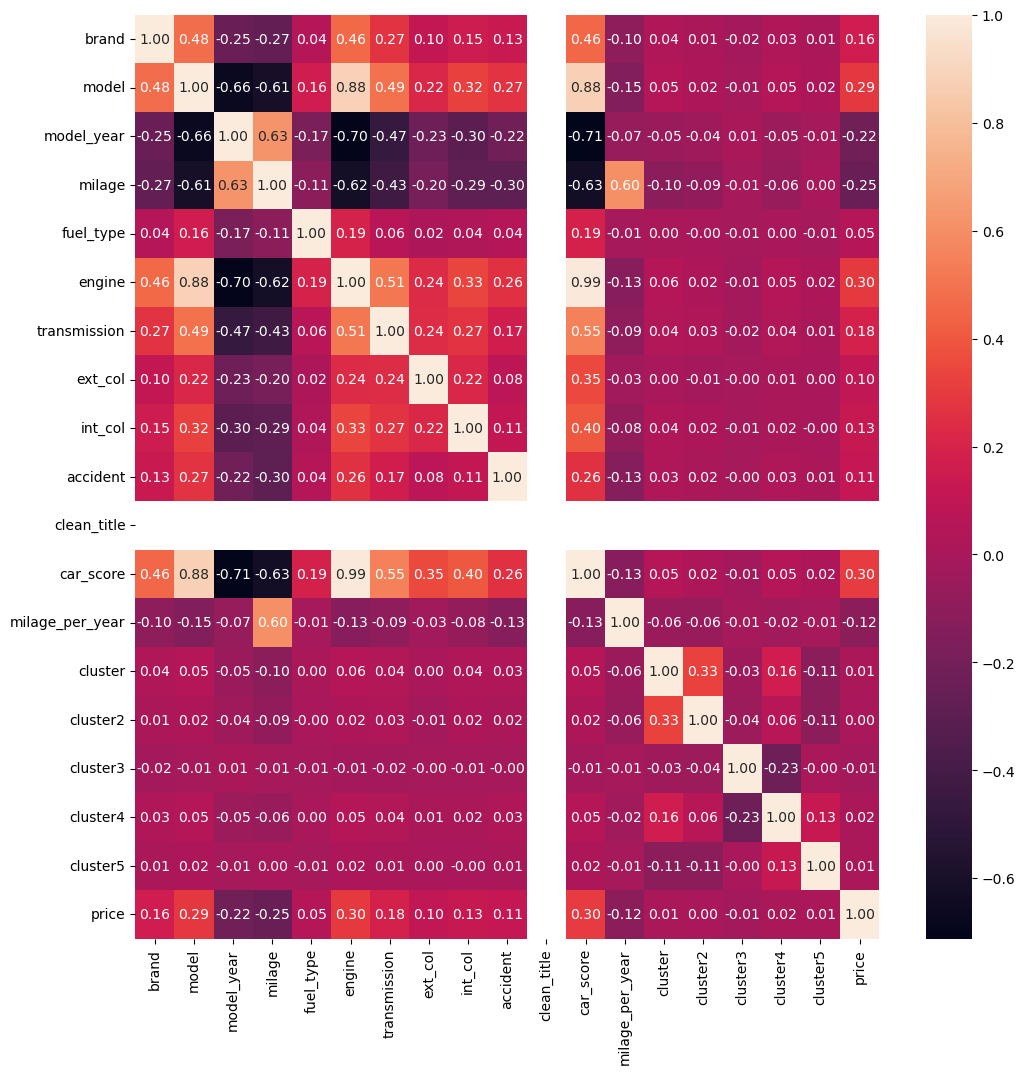

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [40]:
df.drop(['price'], axis=1, inplace=True)

## Models Training and testing

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3, random_state=42)

# model training
model = LinearRegression()

model.fit(X_train, y_train)

# metrics printing
print("Linear model rmse:", mean_squared_error(y_test, model.predict(X_test), squared=False))
print("Linear model R2 Score:", r2_score(y_test, model.predict(X_test)))


Linear model rmse: 63084.12855233654
Linear model R2 Score: 0.1190234109064695


In [50]:
# lasso
lasso = Lasso(100)
lasso.fit(X_train, y_train)
print("Lasso model rmse:", mean_squared_error(y_test, lasso.predict(X_test), squared=False))
print("Lasso model R2 Score:", r2_score(y_test, lasso.predict(X_test)))


Lasso model rmse: 63253.2292426073
Lasso model R2 Score: 0.11429406236291595


c:\Users\mohit\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.701e+13, tolerance: 2.143e+10
  model = cd_fast.enet_coordinate_descent(


In [51]:
from sklearn.linear_model import LassoCV

# lassoCV
lassocv = LassoCV(n_alphas=1000)
lassocv.fit(X_train, y_train)
print("LassoCV model rmse:", mean_squared_error(y_test, lassocv.predict(X_test), squared=False))
print("LassoCV model R2 Score:", r2_score(y_test, lassocv.predict(X_test)))


LassoCV model rmse: 63594.08903462256
LassoCV model R2 Score: 0.10472253563726952


In [52]:
# ridge
ridge = Ridge(200)
ridge.fit(X_train, y_train)
print("Ridge model rmse:", mean_squared_error(y_test, ridge.predict(X_test), squared=False))
print("Ridge model R2 Score:", r2_score(y_test, ridge.predict(X_test)))



Ridge model rmse: 63126.98686935497
Ridge model R2 Score: 0.1178259623371154


In [134]:
# elasticnetCV
from sklearn.linear_model import ElasticNetCV
encv = ElasticNetCV(cv=5, random_state=42)
encv.fit(X_train, y_train)
print("encv model rmse:", mean_squared_error(y_test, encv.predict(X_test), squared=False))
print("encv model R2 Score:", r2_score(y_test, encv.predict(X_test)))



c:\Users\mohit\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415120629428.5625, tolerance: 18094762524.1939
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\mohit\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 856776538380.7188, tolerance: 18094762524.1939
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\mohit\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115723590263.9375, tolerance: 14204410000.118801
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\mohit\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: Con

encv model rmse: 64604.681237427765
encv model R2 Score: 0.07604221819035828


c:\Users\mohit\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.357e+12, tolerance: 2.143e+10
  model = cd_fast.enet_coordinate_descent(


In [53]:
# using ensemble techniques

import xgboost as xgb


dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
d_test = xgb.DMatrix(test_df)

param = {
    'objective' : "reg:squarederror",
    'max_depth' : 5,
    'eta' : 0.07,
    'subsample' : 0.8,
    'colsample_bytree' : 0.8
}

num_rounds = 100

bst = xgb.train(param, dtrain, num_rounds)

print("xgboost model rmse:", mean_squared_error(y_test, bst.predict(dtest), squared=False))
print("XGBoost model R2 Score:", r2_score(y_test, bst.predict(dtest)))



xgboost model rmse: 59955.609810414455
XGBoost model R2 Score: 0.20423689285048974


In [70]:
best_xgb_pred = best_xgb_reg.predict(test_df)


In [54]:
xgboost_prediction = bst.predict(d_test)


### Submission file making section

In [56]:
def submission_file_maker(predicted_price, model_name):
    sub = pd.DataFrame({
        'id': test_df.index,
        'price': predicted_price
    })

    sub.to_csv(f"../data/submission_{model_name}.csv", index=False)

In [140]:
# lasso regression
submission_file_maker(lasso.predict(test_df), "lasso_model")


In [57]:
# xgboost regression
submission_file_maker(xgboost_prediction, "xgb-model")

In [71]:
# best xgbreg predittion
submission_file_maker(best_xgb_pred, "best-xgb-reg-model")


### Important model saving

In [35]:
import pickle
def save_model(model):
    with open("../data/imp_model.pkl", "wb+") as f:
        pickle.dump(model, f)
    print("Model Saved!")

In [36]:
# saving bst
save_model(bst)

Model Saved!
